#### **Array in python**

##### Getting ready
We'll cover an array creation procedure. We'll fist create an array using numpy and then display its structure.

##### How to do it

In [1]:
import numpy as np
data = np.array([[3, -1.5, 2, -5.4], [0, 4, -0.3, 2.1], [1, 3.3, -1.9, -4.3]])
data

array([[ 3. , -1.5,  2. , -5.4],
       [ 0. ,  4. , -0.3,  2.1],
       [ 1. ,  3.3, -1.9, -4.3]])

##### There's more
numpy provides us various tools for creating an array. For ex, to create on-D array of equidistant values with numbers from 0 to 10, we should use the ```arange()``` function, as follows

In [2]:
npArray1 = np.arange(10)
npArray1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

To create a numeric array from 0 to 50, with a step of 5 (using predetermined step between successive values), we will write the following code:

In [3]:
npArray2=np.arange(10, 100, 5)
npArray2

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])

Also, to create a $1$-D array of 50 numbers between 2 limit values and that are equidistant in this range, we will use the ```linspace()``` function

In [4]:
npArray3 = np.linspace(0, 10, 50)
npArray3

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

#### **Data preprocessing *using mean removal***

In the real world, we usually have to deal with a lot of raw data. This raw data is not readily ingestible by machine learning algorithms. To prepare data for machine learning, we have to preprocess it before we feed it into various algorithms.\
This is an intensive process that takes plenty of time, almost $80\%$ of the entire data analysis process, in some scenarios. However, it is vital for the rest of the data analysis workflow, so it is necessary to learn the best practices of these techniques. Before sending our data to any machine learning algorithm, we need to cross check the quality and accuracy of the data. If we are unable to reach the data stored in Python correctly, or if we can't switch from raw data to something that can be analyzed, we cannot go ahead.\
Data can be preprocessed in many ways—***standardization, scaling, normalization, binarization, and one-hot encoding*** are some examples of preprocessing techniques. We will address them through simple examples.

##### Getting ready

<t style="color: yellow">Standardization or mean removal</t> is a technique that simply **centers data by removing the average value of each characteristic, and then scales it by dividing non-constant characteristics by their standard deviation**. It's usually beneficial to remove the mean from each feature so that it's centered to $0$. This helps us remove bias from features. The formula used to achieve this is:

$$
x_{\text{scaled}} = \frac{\text{s} - \text{mean}}{\text{sd}}
$$

Standardization results in **the rescaling of features**, which in turn represents of a **standard normal distribution** $\text{mean} = 0$, $\text{sd} = 1$. In this formula, mean is the *mean* and *sd* is the standard deviation of the mean.

##### How to do it

In [5]:
# 1 Let's import sklearn
from sklearn import preprocessing

In [6]:
# 2 To understand the outcome of mean removal on our data, which can ve a sequence
print("Mean: ", data.mean(axis=0))
print("Standard deviation: ", data.std(axis=0))
# or an iterator. The std() function returns the standard deviation, a measure of the
# distribution of the array elements. The axis parameter specifies the axis along which
# these functions are compured 0 for columns and 1 for rows

Mean:  [ 1.33333333  1.93333333 -0.06666667 -2.53333333]
Standard deviation:  [1.24721913 2.44449495 1.60069429 3.30689515]


In [7]:
# 3 Now, let's perform the standardization
data_standardized = preprocessing.scale(data)
# The preprocessing.scale() function standardizes the dataset along any axis. This method centers the
# data on the mean and resizes the components in order to have a unit variance

In [8]:
# 4 Now we recalculate the mean and standard deviation on the standardized data
print("Mean: ", data_standardized.mean(axis=0))
print("Standard deviation: ", data_standardized.std(axis=0))

Mean:  [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
Standard deviation:  [1. 1. 1. 1.]


You can see that the *mean* is almost $0$ and the *standard deviation* is $1$.

##### How it works
The `sklearn.preprocessing` package provides several common utility functions and transformer classes to modify the features available in a representation that best suits our needs. In this recipe, the `scale()` function has been used **(z-score standardization)**.  In summary, the `z-score` (also called the standard score) represents **the number of standard deviations by which the value of an observation point or data is greater than the mean value of what is observed or measured**. **Values more than the mean have positive z-scores**, while **values less than the mean have negative z-scores**. The z-score is a quantity without dimensions that is obtained by **subtracting the population's mean from a single rough score and then dividing the difference by the standard deviation of the population**.

##### There's more
Standardization is particularly useful when **we do not know the minimum and maximum for data distribution**. In this case, it is not possible to use other forms of data transformation. As a result of the transformation, the normalized values do not have a minimum and a fixed maximum. Moreover, **this technique is not influenced by the presence of outliers, or at least not the same as other methods**.

#### **Data Scaling**
The values of each feature in a dataset can vary between random values. So, sometimes it is important to scale them so that this becomes a level of playing field. Through this statistical procedure, it's possible to compare identical variables belonging to different distributions and diffrent variables.

*Note: It is a good practice to rescale data before training a ml algorithm. With rescaling, data units are eliminated, allowing you to easily compare data from different locations*

##### Getting ready
We'll use the **min-max** method(usually called **feature scaling**) to get all of the scaled data in the range $[0, 1]$. The formula used to achieve this is as follows:

$$
x_{\text{scaled}} = \frac{\text{s} - x_{min}}{x_{max} - x_{min}}
$$

To **scale features between a given minimum and maximum** value—in our case, between 0 and 1—so that the maximum absolute value of each feature is scaled to unit size, the ```preprocessing.MinMaxScaler()``` function can be used. 

##### How to do it
Let's see how to scale data in python

In [9]:
# 1 Let's start by defining the data_scaler variable
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# 2 Now we will use the fit_transform() method, which fits the data and then transforms
# it(we will use the same data as in the previous recipe)
data_scaled = data_scaler.fit_transform(data)
# A numpy array of a specific shape is returned. To understand how this function has transformed
# data, we display the min and max of each column in the array

# 3 First, for the starting data and then for the processed data
print("Min: ", data.min(axis=0))
print("Max: ", data.min(axis=0))

Min:  [ 0.  -1.5 -1.9 -5.4]
Max:  [ 0.  -1.5 -1.9 -5.4]


In [10]:
# Now let's do the samed forprint("Min: ", data.min(axis=0))
print("Max: ", data_scaled.min(axis=0))
print("Max: ", data_scaled.max(axis=0))

Max:  [0. 0. 0. 0.]
Max:  [1. 1. 1. 1.]


In [11]:
# After scaling, all the feature values range between the specific values
# 5 to display the scaled array, we will use
print(data_scaled)

[[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


Now all the data is included in the same interval.

##### How it works...
When data has different range, **the impact on response variables might be higher than the one with a lesser numeric range**, which can affect the prediction accuracy. Our goal is to improve predictive accuracy and ensure this doesn't happen. Hence, we may need to scale values under different features so that they fall within a similar range. Through this statistical procedure, it's possible to compare identical variables belonging to different distributions and different variables or variables expressed in different units.

##### There's more
Feature scaling consists of limiting the excursion of a set of values within a certain predefined interval. It guarantees that all functionalities have the exact same scale, but does not handle anomalous values well. This is because extreme values become the extremes of the new range of variation. In this way, the actual values are compressed by keeping the distance to the anomalous values.

#### **Normalization**
Data normalization is used **when you want to adjust the values in the feature vector so that they can be measured on a common scale**. One of the most common forms of normalization that is used in ML adjusts the values of a feature vector so that they sum up to 1.

##### Getting ready

To normalize datan the `preprocessing.normalize()` function can be used. It **scales input vectors individually to a unit form (vector length)**. Three types of norms are provided, `l1, l2` or `max`, and they are explained next. If $x$ is the vector of covariates of length $n$, the normalized vector is $y = \frac{x}{z}$ where $z$ is defined as follows

$$
l1: z = \sum^{n}_{i}|x_i|
$$

$$
l2: z = \sqrt{\sum^{n}_{i}x^2_i}
$$

$$
max: z = max(x_i)
$$

The **norm** is a function that assigns a positive length to each vetor belonging to a vector space, except $0$.

##### How to do it

In [12]:
# 1 As said, to normalize data, the preprocessing.normalize() function can be used
# as follows (we will use the same data as in the previous recipe)
data_normalized = preprocessing.normalize(data, norm='l1', axis=0)

# 2 To display the normalized array, we will use the following code
print(data_normalized)


[[ 0.75       -0.17045455  0.47619048 -0.45762712]
 [ 0.          0.45454545 -0.07142857  0.1779661 ]
 [ 0.25        0.375      -0.45238095 -0.36440678]]


In [13]:
# This is used a lot to make sure that datasets don't get boosted artificially due to
# the funcdamendal nature of their features

# 3 As already mentionned, the normalized array along the columns (features) must reutrn a sum
# equal to 1, let's check for each column
data_norm_abs = np.abs(data_normalized)
print(data_norm_abs.sum(axis=0))
# In the first line of code, we used the np.abs() function to evaluate the absolute value
# of each element in the array. In the second row of code, we used the sum() function to
# calculate the sum of each column (axis=0). The following results are returned:

[1. 1. 1. 1.]


Therefore, the sum of the absolute value of the elements of each column is equal to 1, so the data is normalized.

##### How it works
In this recipe, we normalized the data at our disposal to the unitary norm. Each sample with at least one non-zero component was rescaled independently of other samples so that its norm was equal to one.

##### There's more
Scalling inputs to a unit norm is a very common task in text classification and clustering problems.

#### **Binarization**
Binarization is used when you want to **convert a numerical feature vector into a boolean vector**. In the field of digital image processing, image binarization is the process by which a color or grayscale image is transformed into a binary image, that is, an image with only $2$ color (back and white)

##### Getting ready
This technique is used for the recognition of objects, shapes and specifically, characters. **Through binarization, it is possible to distinguish the object of interest from the background on which it is found**. **Skeletonization** is instead an essential and schematic representation of the object, which generally preludes the subsequent real recognition.

##### How to do it

In [14]:
# 1 To binarize data, we will use the preprocessing.Binarizer() function as follows
# on the same data
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)

The ```preprocessing.Binarizer()``` function binarizes data according to an imposed ```threshold``` map to $0$. With the default *threshold* of $0$, only positive values map to 1. In our case, the *threshold* imposed is $1.4$, so values **greater than $1.4$ are mapped to $1$, while values less are mapped to $0$**

In [15]:
# 2 To display the binarized array
print(data_binarized)

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


This is a very useful technique that's usually used when we have some prior knowledge of the data

##### How it works
The fundamental idea of ​​this technique is to draw a fixed demarcation line. It is therefore a matter of finding an appropriate threshold and affirming that all the points of the image whose light intensity is below a certain value belong to the object (background), and all the points with greater intensity belong to the background (object).


##### There's more
Binarization is a widespread operation on count data, in which the analyst can decide to consider only the presence or absence of a characteristic rather than a quantified number of occurrences. Otherwise, it can be used as a preprocessing step for estimators that consider random Boolean variables.

#### **One-Hot encoding**
We often deal with numerical values that are sparse and scattered all over the place. We don't really need to store these values. This is where one-hot encoding comes into the picture. **We can think of one-hot encoding as a tool that tightens feature vectors**. It **looks at each feature and identifies the total number of distinct values**. It uses a one-of-k scheme to encode values. Each feature in the feature vector is encoded based on this scheme. This helps us to be more efficient in terms of space.

##### Getting ready
Let's say we are dealing with $4$-dimensional feature vectors. To encode the $n^{th}$ feature in a feature vector, the encoder will go through the $n^{th}$ feature in each feature vector and count the number of distinct values. If the number of distinct values is $k$, it will transform the feature into a k-dimensional vector where only one value is $1$ and all other values are $0$. Let's take a simple example to understand how this works.

##### How to do it

In [16]:
# 1 Let's take an array with 4 rows (vectors) and 4 columns (features)
data = np.array([[1, 1, 2], [0, 2, 3], [1, 0, 1], [0, 1, 0]])
print(data)

[[1 1 2]
 [0 2 3]
 [1 0 1]
 [0 1 0]]


Let's analyze the values present in each column (feature):

* The first feature has two possible values: $0, 1$
* The second feature has three possible values: $0, 1, 2$
* The third feature has four possible values: $0, 1, 2, 3$
So, overall, **the sum of the possible values present in each feature is given by** $2 + 3 + 4 = 9$. This means that **$9$ entries are required to uniquely represent any vector**. The three features will be represented as follows:

* Feature $1$ starts at index $0$
* Feature $2$ starts at index $2$
* Feature $3$ starts at index $5$

In [17]:
# To encode categorical integer features as a one-hot numeric array, the preprocessing.OneHotEncoder() function
# can be used as follows
encoder = preprocessing.OneHotEncoder()
encoder.fit(data)

# The first row of code sets the encoder, then the fit() function fits the OneHotEncoder object to a data array
# 3 Now we can transform the data array using one hot encoding. To do so, the
# transform() function will be used as follows
encoded_vector = encoder.transform([[1, 2, 3]]).toarray()
print(encoded_vector)

[[0. 1. 0. 0. 1. 0. 0. 0. 1.]]


The result is clear: the first feature (1) has an index of 1, the second feature (3) has an index of 4, and the third feature (3) has an index of 8. As we can verify, only these positions are occupied by a 1; all the other positions have a 0. Remember that Python indexes the positions starting from 0, so the 9 entries will have indexes from 0 to 8.

##### How it works
The `preprocessing.OneHotEncoder()` function encodes categorical integer features as a one-hot numeric array. Starting from an array of integers or strings that denotes the values assumed by categorical characteristics (discrete), this function encodes the characteristics using a one-hot coding scheme, returning dummy variables. This creates a binary column for each category and returns a sparse array or a dense array.

##### There's more
It often happens that you have to convert categorical data. This is due to the fact that many machine learning algorithms can't work directly with categorical data. To use these methods, it is necessary to first transform categorical data into numerical data. This is required for both input and output variables.

#### **Label encoding**
In SL, we usually deal with a variety of labels. These can be either numbers or words. If they are numbers, then the algorithm can use them directly. However, labels often need to be in a human readable form. So, people usually label the training data with words

##### Getting ready
Label encoding refers to **transforming word labels into a numerical form so that algorithms can understand how to operate on them**. Let's take a look at how to do this.

##### How to do it

In [18]:
# 1 import the preprocessing package
from sklearn import preprocessing

# 2 The package contains various functions that are needed for data
# processing. To encode labels with a value between 0 and n_classes-1, the
# preprocessing.labelEncoder() function can be used. Let's define the label encoder as follows
label_encoder = preprocessing.LabelEncoder()

# 3 The label_encoder object knows how to understand words labels. Let's create some labels:
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']

# 4 We are now ready to encode these labels-first, the fit() function is used to fit the label encoder
# and then the class mapping encoder are printed
label_encoder.fit(input_classes)
print("Class mapping: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, '--->', i)
# Run

Class mapping: 
audi ---> 0
bmw ---> 1
ford ---> 2
toyota ---> 3


In [19]:
# 6 As shown in the preceding output, the words have been transformed into zero indexed numbers. Now, when you encounter a set of labels,
# you can simply transform them as follows
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print("labels = ", labels)
print("Encoded labels = ", list(encoded_labels))

labels =  ['toyota', 'ford', 'audi']
Encoded labels =  [3, 2, 0]


In [20]:
# This is way easier than mannualy maintaining mapping between words
# and numbers. You can check the correcteness by transforming numbers back into words labes
encoded_labels = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print("Encoded labels =", encoded_labels)
print("Decoded labels =", list(decoded_labels))


Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['ford', 'bmw', 'audi', 'toyota', 'bmw']


To transform labels back to their original encoding, the `inverse_transform()` function has been applied.

##### How it works...
In this recipe, we used the `preprocessing.LabelEncoder()` function to transform word labels into numerical form. To do this, we first set up a series of labels to as many car brands. We then turned these labels into numerical values. Finally, to verify the operation of the procedure, we printed the values corresponding to each class labeled.

##### There's more
In the last two recipes, Label encoding and One-hot encoding, we have seen how to transform data. Both methods are suitable for dealing with categorical data. But what are the pros and cons of the two methodologies? Let's take a look:

* **Label encoding** can *transform categorical data into numeric data*, but the *imposed ordinality creates problems if the obtained values are submitted to mathematical operations*.
* **One-hot encoding** has the *advantage that the result is binary rather than ordinal*, and that everything is in an orthogonal vector space. The disadvantage is that *for high cardinality, the feature space can explode*.

#### **Building a Linear regressor**

Linear regression refers to finding the underlying function with the help of linear combination of input variables. The previous example had an input variable and an output variable. A simple linear regression is easy to understand, but represents the basis of regression techniques. Once these concepts are understood, it will be easier for us to address the other types of regression.

The linear regression method consists of precisely identifying a line that is capable of representing point distribution in a two-dimensional plane, that is, if the points corresponding to the observations are near the line, then the chosen model will be able to describe the link between the variables effectively. 

In theory, there are an infinite number of lines that may approximate the observations, while in practice, there is only one mathematical model that optimizes the representation of the data. In the case of a linear mathematical relationship, the observations of the y variable can be obtained by a linear function of the observations of the x variable. For each observation, we will use the following formula:

$y = \alpha \times x + \beta$

In the preceding formula, x is the explanatory variable and y is the response variable. The α and β parameters, which represent the slope of the line and the intercept with the y-axis respectively, must be estimated based on the observations collected for the two variables included in the model.

The slope, $\alpha$, is of particular interest, that is, the variation of the mean response for every single increment of the explanatory variable. What about a change in this coefficient? If the slope is positive, the regression line increases from left to right, and if the slope is negative, the line decreases from left to right. When the slope is zero, the explanatory variable has no effect on the value of the response. But it is not just the sign of α that establishes the weight of the relationship between the variables. More generally, its value is also important. In the case of a positive slope, the mean response is higher when the explanatory variable is higher, while in the case of a negative slope, the mean response is lower when the explanatory variable is higher.

The main aim of linear regression is to get the underlying linear model that connects the input variable to the output variable. This in turn reduces the sum of squares of differences between the actual output and the predicted output using a linear function. This method is called ordinary least squares. In this method, the coefficients are estimated by determining numerical values that minimize the sum of the squared deviations between the observed responses and the fitted responses, according to the following equation:

$RSS = \sum^{n}_{i=1}(\alpha \times x_i + \beta - y_i)^2$

This quantity represents the sum of the squares of the distances to each experimental datum $(x_i, y_i)$ from the corresponding point on the straight line.

You might say that there might be a curvy line out there that fits these points better, but linear regression doesn't allow this. The main advantage of linear regression is that it's not complex. If you go into non-linear regression, you may get more accurate models, but they will be slower. As shown in the preceding diagram, the model tries to approximate the input data points using a straight line. Let's see how to build a linear regression model in Python.

##### Getting ready

Regression **is used to find ut the relationship between input data and the continuously-valued output data. This is generally represented as real numbers, and our aim is to estimate the core function that calculates the mapping from the input to the output.**
You have been provided with a data file called VehiclesItaly.txt. This contains comma-separated lines, where the first element is the input value and the second element is the output value that corresponds to this input value. Our goal is to find the linear regression relation between the vehicle registrations in a state and the population of a state. You should use this as the input argument. As anticipated, the Registrations variable contains the number of vehicles registered in Italy and the Population variable contains the population of the different regions.

##### How to do it

Let's see how to build a linear regressor in Python

See the regressor.py file

#### **Computing regression accuracy**

Now that we know how to build a regressor, it's important to understand how to evaluate the quality of a regressor as well. In this context, **an error is defined as the difference between the actual value and the value that is predicted by the regressor**


##### Getting ready
Let's quickly take a look at the metrics that can be used to measure the quality of a regressor. A regressor can be evaluated using many different metrics. There is a module in the scikit-learn library that provides functionalities to compute all the following metrics. This is the `sklearn.metrics` module, which includes **score functions**, **performance metrics**, **pairwise metrics**, and **distance computations**.

##### How to do it
Let's see how to compute regression accuracy

See regressor.py

##### How it works

A regressor can be evaluated using many different metrics, such as the following:

* **Mean absolute error**: This is the average of absolute errors of all the data points in the given dataset.
* **Mean squared error**: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
* **Median absolute error**: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
* **Explained variance score**: This score measures how well our model can account for the variation in our dataset. A score of $1.0$ indicates that our model is perfect.
* **R2 score**: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is $1.0$, but the score can be negative as well.

##### There's more
The sklearn.metrics module contains a series of simple functions that measure prediction error:
* Functions ending with `_score` return a value to maximize, the higher the better
* Functions ending with `_error` or `_loss` return a value to minimize, the lower the better

#### **Achieving Model Persistance** 

When we train a model, it would be nice if we could save it as a file so that it can be used later by simply loading it again

##### Getting ready
Let's see how to achieve model persistence programmatically. To do this, the pickle module can be used. The pickle module is used to store Python objects. This module is a part of the standard library with your installation of Python.

see regressor.py

##### How it works

The pickle module transforms an **arbitrary Python object into a series of bytes**. This process is also called the **serialization of the object**. The byte stream representing the object can be transmitted or stored, and subsequently rebuilt to create a new object with the same characteristics. The inverse operation is called **unpickling**.

##### There's more
In Python, there is also another way to perform serialization, **by using the marshal module**. In general, the pickle module is recommended **for serializing Python objects**. The marshal module can be used to support Python `.pyc` files.

#### **Buildind a ridge regressor**

One of the main problems of linear regression is that it's sensitive to outliers. During data collection in the real world, it's quite common to wrongly measure output. Linear regression uses ordinary least squares, which tries to minimize the squares of errors. The outliers tend to cause problems because they contribute a lot to the overall error. This tends to disrupt the entire model.

Outliers are values that, compared to others, are particularly extreme (values that are clearly distant from the other observations). Outliers are an issue because they might distort data analysis results; more specifically, descriptive statistics and correlations.

Outliers can be univariate when they have an extreme value for a single variable, or multivariate when they have a unique combination of values for a number of variables

The `regularization` method involves modifying the performance function, normally selected as the sum of the squares of regression errors on the training set. When a large number of variables are available, the least square estimates of a linear model often have a low bias but a high variance with respect to models with fewer variables. Under these conditions, there is an overfitting problem. To improve precision prediction by allowing greater bias but a small variance, we can use variable selection methods and dimensionality reduction, but these methods may be unattractive for computational burdens in the first case or provide a difficult interpretation in the other case.

Another way to address the problem of overfitting is to modify the estimation method by neglecting the requirement of an unbiased parameter estimator and instead considering the possibility of using a biased estimator, which may have smaller variance. There are several biased estimators, most of which are based on regularization: Ridge, Lasso, and ElasticNet are the most popular methods.

##### Getting ready
**Ridge regression** is a regularization method where **a penalty is imposed on the size of the coefficients**. As we said in the Building a linear regressor section, in the ordinary least squares method, the coefficients are estimated by determining numerical values that minimize the sum of the squared deviations between the observed responses and the fitted responses, according to the following equation:

$RSS = \sum^{n}_{i=1}(y_i - \beta_1 * x_i + \beta_2)^2$

**Ridge regression**, in order to estimate the $\beta$ coefficients, starts from the basic formula of the **residual sum of squares (RSS) and adds the penalty term**. $\lambda$ ($\ge 0$) is defined as **the tuning parameter**, which is multiplied **by the sum of the $\beta$ coefficients squared (excluding the intercept)** to define the penalty period, as shown in the following equation:

$\sum^{n}_{i=1}(y_i - \beta_1 * x_i + \beta_2)^2 + \lambda * \beta^2_1 = RSS + \lambda * \beta^2_1$

It is evident that having $\lambda = 0$ means **not having a penalty in the model**, that is, **we would produce the same estimates as the least squares**. On the other hand, having a $\lambda$ tending toward infinity means **having a high penalty effect**, which will bring many coefficients close to zero, but will not imply their exclusion from the model. Let's see how to build a ridge regressor in Python.

##### How to do it
Let's see how to build a ridge regressor in python

See `regressor.py`

##### How it works

**Ridge regression is a regularization method** where a **penalty is imposed on the size of the coefficients**. **Ridge regression is identical to least squares**, barring the fact that **ridge coefficients are computed by decreasing a quantity that is somewhat different**. In ridge regression, a scale transformation has a substantial effect. Therefore, to avoid obtaining different results depending on the predicted scale of measurement, **it is advisable to standardize all predictors before estimating the model**. To standardize the variables, we must *subtract their means and divide by their standard deviations*.

#### **Building a polynomial regressor**

One of the main constraints of a linear regression model is the fact that **it tries to fit a linear function to the input data**. The polynomial regression model overcomes this issue **by allowing the function to be a polynomial**, thereby increasing the accuracy of the model.

##### Getting ready
Polynomial models should be applied **where the relationship between response and explanatory variables is curvilinear**. Sometimes, polynomial models can also be used **to model a non-linear relationship in a small range of explanatory variable**. A polynomial quadratic (squared) or cubic (cubed) term **converts a linear regression model into a polynomial curve**. However, since it is the explanatory variable that is squared or cubed and not the beta coefficient, it is still considered as a linear model. This makes it a simple and easy way to model curves, without needing to create big non-linear models

The curviness of a model is controlled by the degree of the polynomial. As the curviness of the model increases, it gets more accurate. However, **curviness adds complexity to the model as well, making it slower**. This is a trade-off: **you have to decide how accurate you want your model to be given the computational constraints**.

##### How to do it
Let's see how to build a polynomial regressor

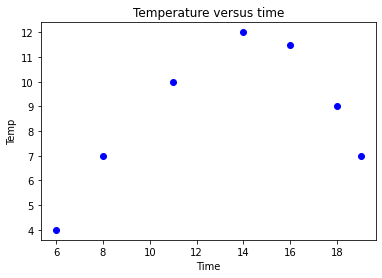

In [21]:
# 1 n this example, we will only deal with second-degree parabolic
# regression. Now, we'll show how to model data with a polynomial.
# We measured the temperature for a few hours of the day. We want
# to know the temperature trend even at times of the day when we
# did not measure it. Those times are, however, between the initial
# time and the final time at which our measurements took place:
import numpy as np

Time = np.array([6, 8, 11, 14, 16, 18, 19])
Temp = np.array([4, 7, 10, 12, 11.5, 9, 7])

# 2 Now, we will show the temperature at a few points during the day:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Time, Temp, 'bo')
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title('Temperature versus time')
plt.show()

If we analyze the graph, it is possible to note a curvilinear pattern of the data that can be modeled through a second-degree polynomial such as the following equation:

$Temp = \beta_0 + \beta_1 * Time + \beta_2 * Time^2 $

The unknown coefficients, $\beta_0$, $\beta_1$ and $\beta_2$, are estimated by **decreasing the value of the sum of the squares**. This is obtained by **minimizing the deviations of the data from the model to its lowest value (least squares fit)**.

In [22]:
# Let's calculate the polynomial coefficients
beta = np.polyfit(Time, Temp, 2)

The `numpy.polyfit()` function returns the coefficients for a polynomial of degree $n$ (given by us) that is the best fit for the data. The coefficients returned by the function are in descending powers (highest power first), and their length is $n+1$ if $n$ is the degree of the polynomial.

After creating the model, let's verify that it actually fits our data. To do this, use the model to evaluate the polynomial at uniformly spaced times. To evaluate the model at the specified points, we can use the `poly1d()` function. This function returns the value of a polynomial of degree n evaluated at the points provided by us. The input argument is a vector of length $n+1$ whose elements are the coefficients in descending powers of the polynomial to be evaluated:

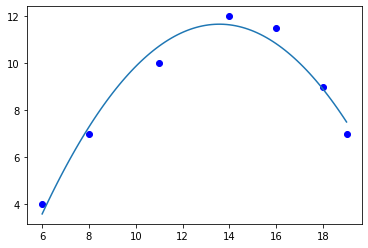

In [23]:
p = np.poly1d(beta)
# As you can see in the upcoming graph, this is
# close to the output value. If we want it to get closer,
# we need to increase the degree of the polynomial.

# 5 Now we are plotting the original data and the model on the same plot
xp = np.linspace(6, 19, 100)
plt.figure()
plt.plot(Time, Temp, 'bo', xp, p(xp), '-')
plt.show()

If we analyze the graph, we can see that the curve fits our data sufficiently.
This model fits the data to a greater extent than a simple linear
regression model. In regression analysis, it's important to keep the order
of the model as low as possible. In the first analysis, we keep the model
as a first order polynomial. If his is not satisfactory, then a second-order
polynomial is tried. The use of higher-order polynomials can lead to incorrect evaluations.


##### How it works
Polynomial regression **should be used when linear regression is not good enough**. With polynomial regression, **we approached a model in which some predictors appear in degrees equal to or greater than two** to fit the data with a curved line. Polynomial regression is usually used when **the relationship between variables looks curved**.

##### There's more
At what degree of the polynomial must we stop? It **depends on the degree of precision we are looking for**. **The higher the degree of the polynomial, the greater the precision of the model**, but the **more difficult it is to calculate**. In addition, it is necessary to verify the significance of the coefficients that are found, but let's get to it right away.

#### Estimating housing prices

It's time to apply our knowledge to a real-world problem. Let's apply all these principles to estimate house prices. This is one of the most popular examples that is used to understand regression, and it serves as a good entry point. This is intuitive and relatable, hence making it easier to understand the concepts before we perform more complex things in machine learning. We will use a decision tree regressor with AdaBoost to solve this problem.


##### Getting ready
A **decision tree** is a tree where each node makes a simple decision that contributes to the final output. The leaf nodes represent the output values, and the branches represent the intermediate decisions that were made, based on input features. **Adaboost** stands for **adaptive boosting**, and this is a technique that is used to boost the accuracy of the results from another system. This combines the outputs from different versions of the algorithms, called **weak learners**, using a weighted summation to get the final output. The information that's collected at each stage of the AdaBoost algorithm is fed back into the system so that the learners at the latter stages focus on training samples that are difficult to classify. In this way, it increases the accuracy of the system.

Using Adaboost, we fit a regressor on the dataset. We compute the error and then fit the regressor on the same dataset again, based on this error estimate. We can think of tis as fine-tuning on the regressor until the desired accuracy is achieved. You are given a dataset that contains various parameters that affect the price of a house. Our goal is to estimate the relationship between these parameters and the house price so that we can use this to estimate the price given unknown input parameters.

##### How to do it
Let's see how to estimate housing prices in Python

In [25]:
# 1 Create a new file called housing.py and add the lines

see housing.py

Each data point has 12 input parameters that affect the price of a house. You can access the input data using housing_data.data and the corresponding price using housing_data.target. The following attributes are available:

* `crim`: Per capita crime rate by town
* `zn`: Proportion of residential land zoned for lots that are over 25,000 square feet
* `indus`: Proportion of non-retail business acres per town
* `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `nox`: Nitric oxides concentration (parts per ten million)
* `rm`: Average number of rooms per dwelling
* `age`: Proportion of owner-occupied units built prior to 1940
* `dis`: Weighted distances to the five Boston employment centers
* `rad`: Index of accessibility to radial highways
* `tax`: Full-value property-tax rate per $10,000
* `ptratio`: Pupil-teacher ratio by town
* `lstat`: Percent of the lower status of the population
* `target`: Median value of owner-occupied homes in $1000 

Of these, `target` is the **response variable**, while the other 12 variables are **possible predictors**. The goal of this analysis is to fit a regression model that best explains the variation in target.

##### How it works
**`DecisionTreeRegressor`** builds a decision tree regressor.  Decision trees are used to predict a response or class $y$, from several input variables; $x_1, x_2,…,x_n$. If $y$ is a **continuous response**, **it's called a regression tree**, if y is **categorical**, **it's called a classification tree**. The algorithm is based on the following procedure:

* We see the value of the input *x_i$ at each node of the tree, and based on the answer, we continue to the left or to the right branch.
* When we reach a leaf, we will find the prediction. In regression trees, we try to divide the data space into tiny parts, where we can equip a simple different model on each of them. The non-leaf part of the tree is just the way to find out which model we will use for predicting it.

A regression tree is formed by a series of nodes that split the root branch into two child branches. Such subdivision continues to cascade. Each new branch, then, can go in another node, or remain a leaf with the predicted value.

##### There's more
An AdaBoost regressor is a meta-estimator that starts by equipping a regressor on the actual dataset and adding additional copies of the regressor on the same dataset, but where the weights of instances are adjusted according to the error of the current prediction. As such, consecutive regressors look at difficult cases. This will help us compare the results and see how AdaBoost really boosts the performance of a decision tree regressor.

##### Computing the relative importance of features
Are all features equally important? In this case, we used 13 input features, and they all contributed to the model. However, an important question here is, How do we know which features are more important? **Obviously, not all features contribute equally to the output**. In case we want to discard some of them later, **we need to know which features are less important**. We have this functionality available in scikit-learn.

##### Getting ready
Let's calculate the **relative importance of the features**. Feature importance provides a measure that indicates the value of each feature in the construction of the model. **The more an attribute is used to build the model, the greater its relative importance**. This importance is **explicitly calculated for each attribute in the dataset**, allowing you to classify and compare attributes to each other.  Feature importance is an attribute contained in the model (`feature_importances_`).

Let's see how to extract this. Let's continue with `housing.py`

##### How it works
Feature importance provides a measure that indicates the value of each feature in the construction of a model. The more an attribute is used to build a model, the greater its relative importance. In this recipe, the feature_importances_ attribute was used to extract the relative importance of the features from the model.

##### There's more
Relative importance returns the utility of each characteristic in the construction of decision trees. The more an attribute is used to make predictions with decision trees, the greater its relative importance. This importance is explicitly calculated for each attribute in the dataset, allowing you to classify and compare attributes to each other.

#### Estimating bicycle demand distribution

Let's use a different regression method to solve the bicycle demand distribution problem. We will use the random forest regressor to estimate the output values. **A random forest is a collection of decision trees**. This **basically uses a set of decision trees that are built using various subsets of the dataset**, and then **it uses averaging to improve the overall performance**. 

##### Getting ready
We will use the bike_day.csv file that is provided to you. This is also available [here](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). There are 16 columns in this dataset. The first two columns correspond to the serial number and the actual date, so we won't use them for our analysis. The last three columns correspond to different types of outputs. The last column is just the sum of the values in the fourteenth and fifteenth columns, so we can leave those two out when we build our model. Let's go ahead and see how to do this in Python. We will analyze the code line by line to understand each step.

##### How to do it
Let's see how to estimate bicycle demande distribution

In [43]:
# 1 We first need to import a couple of new packages
import csv
import numpy as np

# 2 We are processing a CSV file, so the CSV package for useful in handling these files
# let's import the data into the environment
filename = "bike_day.csv"
file_reader = csv.reader(open(filename, 'r'), delimiter=',')
X, y = [], []
for row in file_reader:
    X.append(row[2: 15])
    y.append(row[-1])

This piece of code just read all the data from the CSV file. The `csv.reader()` function returns a reader object, which will iterate over lines in the given CSV file. Each row read from the CSV file is returned as a list of strings. So, two lists are returned: X and y. We have separated the data from the output values and returned them. Now we will extract feature names:



In [44]:
feature_names = np.array(X[0])

The feature names are useful when we display them on a graph. So, we have to remove the first row from X and y because they are feature names:

In [45]:
X=np.array(X[1:]).astype(np.float32)
y=np.array(y[1:]).astype(np.float32)

# We have also converted the two lists into two arrays.

In [46]:
# 3 Let's shuffle these two arrays to make them
# independent of the order in which the data is arranged in the file:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=7)

# 4 As we did earlier, we need to separate the data into
# training and testing data. This time, let's use 90% of the data
# for training and the remaining 10% for testing:
num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# 5 Let's go ahead and train the regressor:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

The `RandomForestRegressor()` function builds a random forest regressor. Here, n_estimators refers to the number of estimators, which is the number of decision trees that we want to use in our random forest. The max_depth parameter refers to the maximum depth of each tree, and the min_samples_split parameter refers to the number of data samples that are needed to split a node in the tree.

In [47]:
# Let's evaluate the performance of the random forest regressor:
y_pred = rf_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Random Forest regressor performance ####
Mean squared error = 21396.29
Explained variance score = 0.99


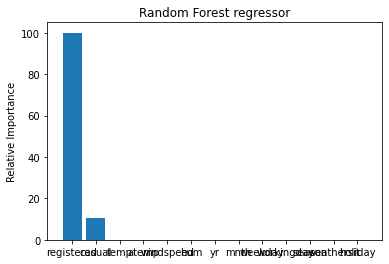

In [48]:
# Let's extract the relative importance of the features:
RFFImp= rf_regressor.feature_importances_ 
RFFImp= 100.0 * (RFFImp / max(RFFImp))
index_sorted = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

# To visualize
import matplotlib.pyplot as plt
plt.figure()
plt.bar(pos, RFFImp[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("Random Forest regressor")
plt.show()


##### How it works
**A random forest is a special regressor formed of a set of simple regressors (decision trees)**, represented as **independent and identically distributed random vectors**, where each one chooses the mean prediction of the individual trees. This type of structure has made significant improvements in regression accuracy and falls within the sphere of ensemble learning. Each tree within a random forest is constructed and trained from a random subset of the data in the training set. The trees therefore do not use the complete set, and the best attribute is no longer selected for each node, but the best attribute is selected from a set of randomly selected attributes.

Randomness is a factor that then becomes part of the construction of regressors and aims to increase their diversity and thus reduce correlation. The final result returned by the random forest is nothing but the average of the numerical result returned by the different trees in the case of a regression, or the class returned by the largest number of trees if the random forest algorithm was used to perform classification.

##### There's more
Let's see what happens when you include the fourteenth and fifteenth columns in the dataset. In the feature importance graph, every feature other than these two has to go to zero. The reason is that the output can be obtained by simply summing up the fourteenth and fifteenth columns, so the algorithm doesn't need any other features to compute the output. Make the following change inside the for loop (the rest of the code remains unchanged):

```py
X.append(row[2:15])
```

If you plot the feature importance graph now, you will see the following:

As expected, it says that only these two features are important. This makes sense intuitively because the final output is a simple summation of these two features. So, there is a direct relationship between these two variables and the output value. Hence, the regressor says that it doesn't need any other variable to predict the output. This is an extremely useful tool to eliminate redundant variables in your dataset. But this is not the only difference from the previous model. If we analyze the model's performance, we can see a substantial improvement:
```py
#### Random Forest regressor performance ####
Mean squared error = 21396.29
Explained variance score = 0.99
```
We therefore have 99% of the variance explained: a very good result.